# im_analysis_skeleton2.py

This is written to serve as an example for anyone who want to implement bioformats in Python2

In [2]:
%matplotlib inline  

import Tkinter as Tk, tkFileDialog
import os, sys
import javabridge as jv
import bioformats as bf
import matplotlib
matplotlib.use("TkAgg") #without this code, Tkinter and Matplotlib don't play nicely
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

##### Start Java Virtual Machine. 
Note that if you try to do this in Python3, the Java Virtual Machine (javabridge version 1.0.14) gives an error.
Also, max_heap_size was set to be 3/4 of my computer's RAM

In [3]:
jv.start_vm(class_path=bf.JARS, max_heap_size='12G')

##### User select image file to work with

In [4]:
root = Tk.Tk()
root.withdraw() #hiding root alllows file diaglog GUI to be shown without any other GUI elements
file_full_path = tkFileDialog.askopenfilename()
filepath, filename = os.path.split(file_full_path)
os.chdir(os.path.dirname(file_full_path))

print('')
print('User Selected:  %s' %filename)
print('')


User Selected:  Cell1.lsm



##### Show metadata
I am using Python-bioformats version 1.1.0 and, as of 4/26/2016, there is a bug in omexml.py. To fix this bug, 
- Go to your path that contains omexml.py (/anaconda/envs/env2_bioformats/lib/python2.7/site-packages/bioformats/ in my case)
- Delete omexml.pyc
- Then open omexml.py and change line 318 from 'isinstance(xml, str):' to 'isinstance(xml, basestring)'

If you don't do this, you may get an error that says "ascii codec can't encode character"

In [5]:
md = bf.get_omexml_metadata(file_full_path)
ome = bf.OMEXML(md)
iome = ome.image(0) # e.g. first image
#print(ome.image_count)

print('')
print('Image Name:  %s' %iome.get_Name())
print('Image ID:  %s' %iome.get_ID()) #what is image ID?
print('Acquisition Date:  %s'  %iome.AcquisitionDate)
print('')

print('Bit Depth:  %s' %iome.Pixels.get_PixelType())
print('XYZ Dimensions:  %s x %s x %s pixels' %(iome.Pixels.get_SizeX(),iome.Pixels.get_SizeY(),iome.Pixels.get_SizeZ()))
print('Time Points:  %s' %iome.Pixels.get_SizeT())
print('DimensionOrder:  %s' %iome.Pixels.DimensionOrder)
#print('get_DimensionOrder:  %s' %iome.Pixels.get_DimensionOrder()) #what is the difference between get_DimensionOrder() and DimensionOrder?
print('Channels:  %s' %iome.Pixels.get_SizeC())
print('Ch1:  %s' %iome.Pixels.Channel(0).Name)
print('Ch2:  %s' %iome.Pixels.Channel(1).Name)
print('')


Image Name:  Cell1
Image ID:  Image:0
Acquisition Date:  2017-02-09T01:32:18

Bit Depth:  uint8
XYZ Dimensions:  800 x 512 x 32 pixels
Time Points:  1
DimensionOrder:  XYCZT
Channels:  2
Ch1:  Ch2-T1
Ch2:  ChS1-T2



##### Show image
In this example, the array dimensions are ordered as ZYXC. There's no T dimension. You can order things however you want. Just need to restructure the loop(s)

Your array of image has the shape:  (32, 512, 800, 2)


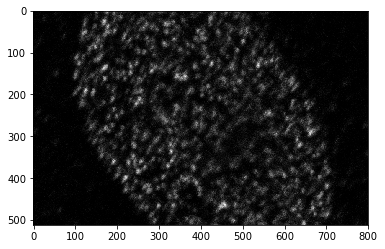

In [6]:
reader = bf.ImageReader(file_full_path)

raw_data = []
for z in range(iome.Pixels.get_SizeZ()):
    raw_image = reader.read(z=z, series=0, rescale=False)
    raw_data.append(raw_image)
    
raw_data = np.array(raw_data)
print('Your array of image has the shape:  %s' %str(raw_data.shape))

plt.imshow(raw_data[16, :, :, 0], cmap=cm.gray)
plt.show()

##### Close Java Virtual Machine at the end

In [7]:
jv.kill_vm()